# Projeto 1 - Gabriel Couto
Pergunta: Países com maior IDH realmente tem maiores taxas de suicídio tanto para homens quanto para mulheres?

Importar bibliotecas e arquivos:

In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

idh0 = pd.read_excel('Indicator_HDI.xlsx')
Shomens = pd.read_excel('Suicide male indicator.xlsx')
Smulheres = pd.read_excel('Suicide female indicator.xlsx')

In [8]:
ano = 2000 #Ano escolhido

#Pegar colunas que importam
m1 = Smulheres.loc[:,['Suicide women age adjusted',ano]]
h1 = Shomens.loc[:,['Suicide among men, per 100 000, age adjusted',ano]]
idh1 = idh0.loc[:,['HDI',ano]]

#Mudar nome das colunas
m1.columns = ['Country', 'Women']
h1.columns = ['Country','Men']
idh1.columns = ['Country','IDH']

#Mudar índice para o país
mulheres = m1.set_index('Country')
homens = h1.set_index('Country')
idh2 = idh1.set_index('Country') 

#Filtrar Nan's
dH = homens[homens['Men']>-1] 
dM = mulheres[mulheres['Women']>-1]
dIDH = idh2[idh2['IDH']>-1]

#Unir as tabelas
dados = dIDH.join(dH.join(dM,how='inner'), how='inner')

#Salvando a tabela criada como CSV:
dados.to_csv('tabelaPronta.csv')

Gráfico de dispersão: IDH x Suicídios masculinos e IDH x Suicídios femininos

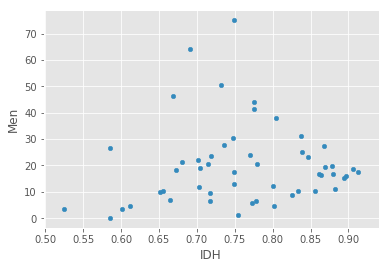

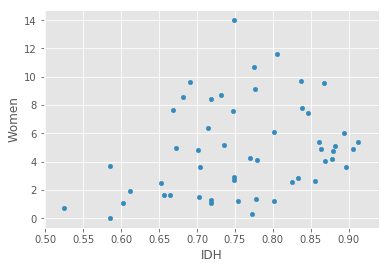

In [9]:
dados.plot.scatter(x="IDH", y = "Men")#,  logx=True)
dados.plot.scatter(x="IDH", y = "Women")#,  logx=True)

O coeficiente de correlação entre as variáveis:

In [11]:
dados.corr()

,IDH,Men,Women
IDH,1.000000,0.065183,0.270789
Men,0.065183,1.000000,0.864259
Women,0.270789,0.864259,1.000000


In [12]:
dados.describe()

,IDH,Men,Women
count,52.000000,52.000000,52.000000
mean,0.761481,20.106163,4.870909
std,0.094416,15.307430,3.262774
min,0.525000,0.118078,0.039894
25%,0.702500,10.071437,2.359902
50%,0.762000,17.504965,4.503623
75%,0.840750,24.351253,7.504652
max,0.913000,75.079410,13.985880


O coef. de correlação entre IDH e Sui.Fem (0.27) sugere uma baixa correlação entre essas duas variáveis.<br>
O coef. de correlação entre IDH e Sui.Mas (0.065) sugere quase que uma ausência de relação entre as duas variáveis.<br>